# OnlineFraud Veri Setinin Analizinin yapılması


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option("display.precision", 2)
frac = 0.000002

In [41]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Datasets/onlinefraud.csv');

## Özniteliklerin incelenmesi

In [42]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

***step***: 1 adımın 1 saate eşit olduğu bir zaman birimini temsil eder.

***type***: İşlemin tipi

***amount***: İşlemin miktarı

***nameOrig***: Müşternin işleme başlaması

***oldbalanceOrg***: İşlemden önce bakiye

***newbalanceOrig***: İşlemden sonra bakiye

***nameDest***: İşlemin alıcısı

***oldbalanceDest***: İşlemden önce alıcının ilk bakiyesi

***newbalanceDest***: İşlemden sonra alıcının ilk bakiyesi

***isFraud***: Sahtecilik mi değil mi

**isFlaggedFraud**: -

## Veri setinin içeriğini kontrol ediyoruz

In [43]:
print("Satır Sayısı: {}".format(dataset.shape[0]))
print("Öznitelik Syısı: {}".format(dataset.shape[1]))
print("Fraud İşlem Sayısı: {}".format(dataset[dataset['isFraud'] == 1].shape[0]))
print("FraudFlagged İşlem Sayısı: {}".format(dataset[dataset['isFlaggedFraud'] == 1].shape[0]))

Satır Sayısı: 6362620
Öznitelik Syısı: 11
Fraud İşlem Sayısı: 8213
FraudFlagged İşlem Sayısı: 16


In [44]:
dataset.sample(frac=frac)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4164965,304,PAYMENT,10573.16,C1795662775,2.81e+04,1.75e+04,M1512896463,0.00e+00,0.00e+00,0,0
2932276,229,PAYMENT,22260.29,C1866907879,0.00e+00,0.00e+00,M444446702,0.00e+00,0.00e+00,0,0
2929593,229,CASH_IN,189840.57,C1896514881,7.07e+04,2.61e+05,C1456703215,0.00e+00,0.00e+00,0,0
5340971,374,PAYMENT,7090.87,C528624990,1.60e+04,8.94e+03,M550800393,0.00e+00,0.00e+00,0,0
1689335,159,CASH_IN,318699.21,C379365748,1.17e+07,1.21e+07,C944707257,4.50e+05,1.32e+05,0,0
5477038,379,CASH_IN,37983.40,C294577631,3.17e+06,3.21e+06,C30182016,4.01e+05,3.63e+05,0,0
4241638,306,CASH_OUT,160587.28,C2039829067,2.08e+04,0.00e+00,C893448711,0.00e+00,1.61e+05,0,0
3926703,285,PAYMENT,8820.64,C1569856572,5.11e+04,4.23e+04,M1689675913,0.00e+00,0.00e+00,0,0
3670117,276,PAYMENT,4291.23,C67590104,7.36e+05,7.32e+05,M597299529,0.00e+00,0.00e+00,0,0
1476979,141,PAYMENT,16065.89,C2027413825,0.00e+00,0.00e+00,M1335451829,0.00e+00,0.00e+00,0,0


In [45]:
dataset.loc[:,"type":"newbalanceOrig"].sample(frac=frac)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig
1062961,PAYMENT,15039.17,C1857516932,9.60e+01,0.00e+00
5442151,CASH_OUT,99832.34,C1085747903,0.00e+00,0.00e+00
3989512,CASH_IN,125538.84,C49587874,5.24e+03,1.31e+05
2161262,CASH_IN,88784.93,C936047729,2.49e+06,2.58e+06
372730,CASH_IN,225213.11,C381719787,2.58e+05,4.83e+05
2274056,PAYMENT,8274.80,C947560278,1.45e+04,6.21e+03
2914647,CASH_IN,266152.74,C879883576,1.07e+05,3.73e+05
1830980,CASH_OUT,225980.32,C2030564413,0.00e+00,0.00e+00
4269007,CASH_IN,284116.58,C1549618409,2.48e+07,2.51e+07
692378,CASH_IN,18600.41,C1141392529,1.61e+06,1.63e+06


Verilerin sütunlara göre kaç adet non-null veri içerdiği ve veri tipinin gösterimi yapılmıştır.

In [46]:
dataset.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Veri setinin istatiksel bilgilerinin gösterilmiştir (count mean std vb)

In [47]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6.36e+06,2.43e+02,1.42e+02,1.0,156.00,239.00,3.35e+02,7.43e+02
amount,6.36e+06,1.80e+05,6.04e+05,0.0,13389.57,74871.94,2.09e+05,9.24e+07
oldbalanceOrg,6.36e+06,8.34e+05,2.89e+06,0.0,0.00,14208.00,1.07e+05,5.96e+07
newbalanceOrig,6.36e+06,8.55e+05,2.92e+06,0.0,0.00,0.00,1.44e+05,4.96e+07
oldbalanceDest,6.36e+06,1.10e+06,3.40e+06,0.0,0.00,132705.66,9.43e+05,3.56e+08
newbalanceDest,6.36e+06,1.22e+06,3.67e+06,0.0,0.00,214661.44,1.11e+06,3.56e+08
isFraud,6.36e+06,1.29e-03,3.59e-02,0.0,0.00,0.00,0.00e+00,1.00e+00
isFlaggedFraud,6.36e+06,2.51e-06,1.59e-03,0.0,0.00,0.00,0.00e+00,1.00e+00


Kategorik Değişkenlerin de incelenmesi görülmüştür.

In [48]:
dataset.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,6362620.0,NaN,NaN,NaN,243.4,142.33,1.0,156.0,239.0,335.0,743.0
type,6362620,5,CASH_OUT,2237500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,6362620.0,NaN,NaN,NaN,179861.9,603858.23,0.0,13389.57,74871.94,208721.48,92445516.64
nameOrig,6362620,6353307,C1902386530,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,6362620.0,NaN,NaN,NaN,833883.1,2888242.67,0.0,0.0,14208.0,107315.18,59585040.37
newbalanceOrig,6362620.0,NaN,NaN,NaN,855113.67,2924048.5,0.0,0.0,0.0,144258.41,49585040.37
nameDest,6362620,2722362,C1286084959,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,6362620.0,NaN,NaN,NaN,1100701.67,3399180.11,0.0,0.0,132705.66,943036.71,356015889.35
newbalanceDest,6362620.0,NaN,NaN,NaN,1224996.4,3674128.94,0.0,0.0,214661.44,1111909.25,356179278.92
isFraud,6362620.0,NaN,NaN,NaN,0.0,0.04,0.0,0.0,0.0,0.0,1.0


## Kategorik Özniteliklerin incelenmesi

nameOrig ve nameDest değişkenlerinin,yukarıda gördüğümüz üzer benzersiz değerleri çok fazla olduğu için incelenmemiştir.

In [49]:
categoricalColumns = dataset.select_dtypes(include = ["object"])


In [50]:
categoricalColumns.sample(frac=frac)

,type,nameOrig,nameDest
2312446,PAYMENT,C1150859414,M143846127
3115721,CASH_IN,C362203093,C640767201
916793,CASH_IN,C2080042808,C1608855651
2066154,CASH_IN,C1936742275,C1364989375
6084572,CASH_OUT,C1368176982,C1951377141
5099446,CASH_OUT,C1969275429,C1728410642
617810,CASH_IN,C1110268083,C703911064
1783844,PAYMENT,C1355845383,M106894821
67918,CASH_IN,C2053287697,C1593812215
2194356,CASH_OUT,C104811060,C1906897029


In [51]:
categoricalColumns["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [52]:
categoricalColumns["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

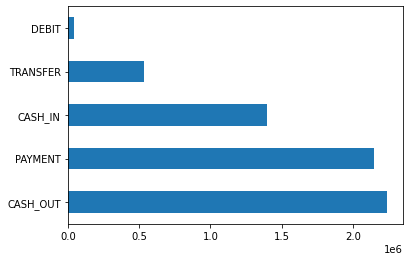

In [53]:
categoricalColumns["type"].value_counts().plot.barh();

In [54]:
type = dataset["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(dataset, values=quantity, names=transactions, hole = 0.5, title="İşlemlerin Dağılımı")
figure.show()

## Veri setinin özniteliklerinin arasındaki ilişkinin incelenmesi

In [55]:
dataset.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.00e+00,2.24e-02,-1.01e-02,-1.03e-02,2.77e-02,2.59e-02,3.16e-02,3.28e-03
amount,2.24e-02,1.00e+00,-2.76e-03,-7.86e-03,2.94e-01,4.59e-01,7.67e-02,1.23e-02
oldbalanceOrg,-1.01e-02,-2.76e-03,1.00e+00,9.99e-01,6.62e-02,4.20e-02,1.02e-02,3.83e-03
newbalanceOrig,-1.03e-02,-7.86e-03,9.99e-01,1.00e+00,6.78e-02,4.18e-02,-8.15e-03,3.78e-03
oldbalanceDest,2.77e-02,2.94e-01,6.62e-02,6.78e-02,1.00e+00,9.77e-01,-5.89e-03,-5.13e-04
newbalanceDest,2.59e-02,4.59e-01,4.20e-02,4.18e-02,9.77e-01,1.00e+00,5.35e-04,-5.29e-04
isFraud,3.16e-02,7.67e-02,1.02e-02,-8.15e-03,-5.89e-03,5.35e-04,1.00e+00,4.41e-02
isFlaggedFraud,3.28e-03,1.23e-02,3.83e-03,3.78e-03,-5.13e-04,-5.29e-04,4.41e-02,1.00e+00


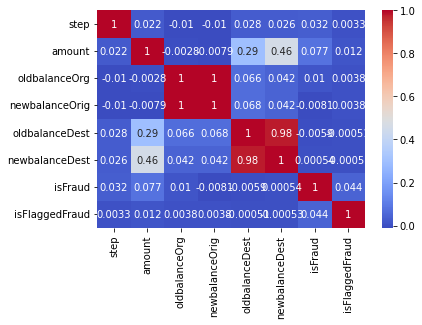

In [56]:
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm");

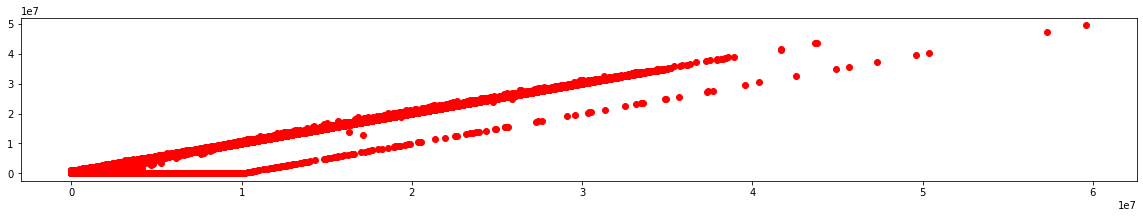

In [57]:
plt.figure(figsize=(20,3))
plt.scatter(dataset['oldbalanceOrg'], dataset['newbalanceOrig'], c='red');

hue olarak amountı eklediğimizde ortaya çıkan grafik gösterilmiştir.

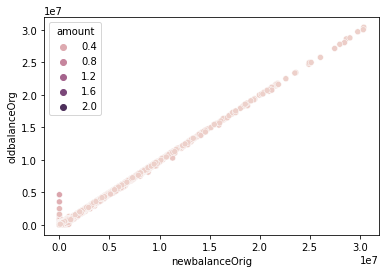

In [58]:
sns.scatterplot(x="newbalanceOrig", y="oldbalanceOrg", hue="amount", data=dataset.sample(frac=0.001));

Sayısal Değişkenlerin Dağılımı gösterilmiştir.

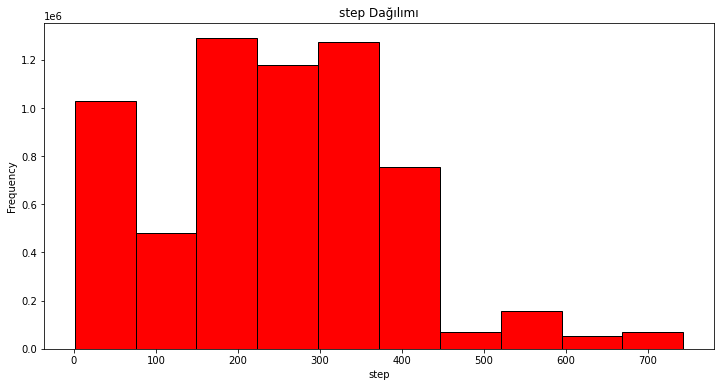

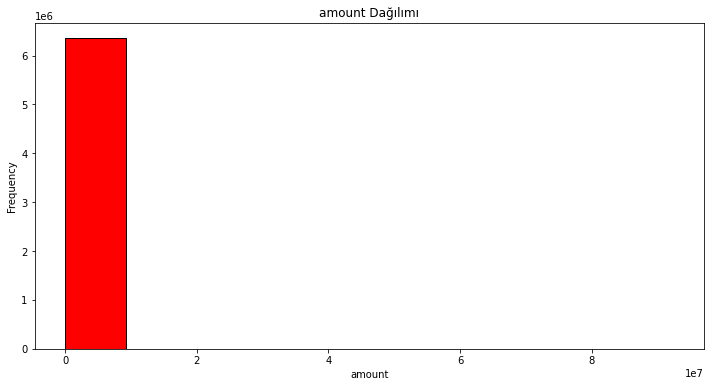

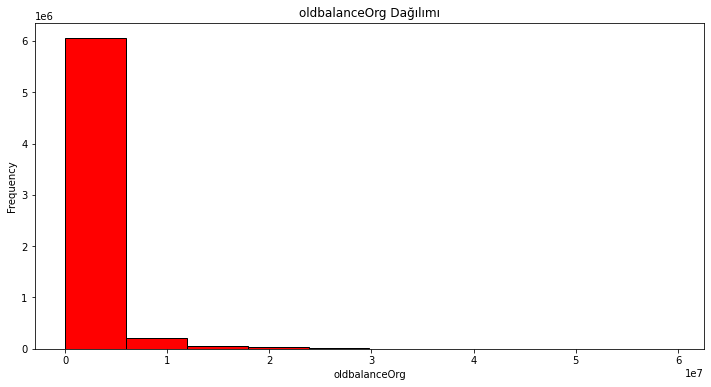

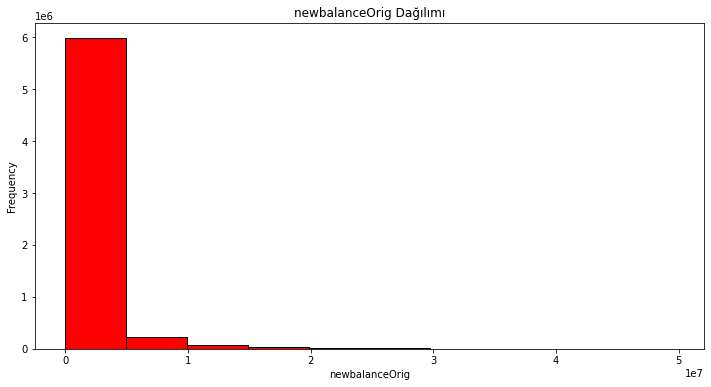

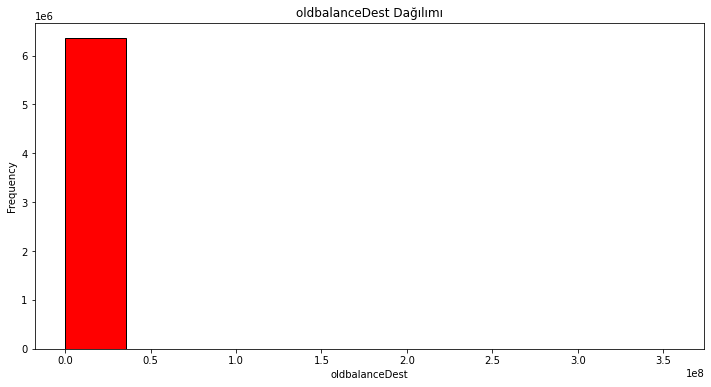

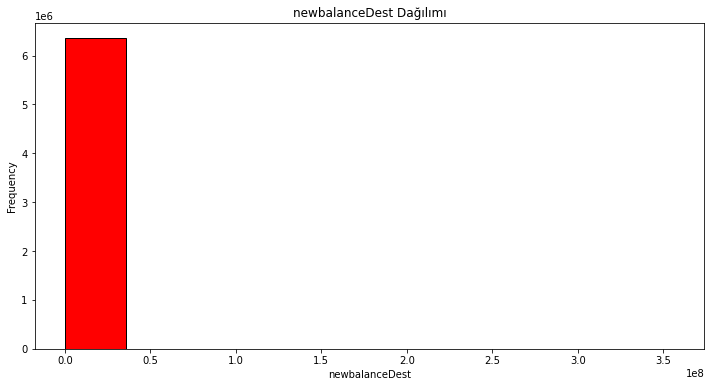

In [59]:
columns=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for column in columns:
    plt.xlabel(column)
    dataset[column].plot(kind='hist', bins=10, figsize=(12,6), facecolor='red',edgecolor='black')
    plt.title(f"{column} Dağılımı")
    plt.show()

# **Özellik Ölçekleme**

Aralarında değer farkı çok yüksek olan özellikleri ölçekleyerek, aralarındaki sayısal farkı azaltmış olduk.

In [60]:
from sklearn import preprocessing

MinMaxScaler ile normalizasyon yapılmıştır.

Xn = (X - Xmin) / (Xmax - Xmin)

In [61]:
data = dataset.loc[:, ["amount", "oldbalanceOrg"]].values
data

array([[9.83964000e+03, 1.70136000e+05],
       [1.86428000e+03, 2.12490000e+04],
       [1.81000000e+02, 1.81000000e+02],
       ...,
       [6.31140928e+06, 6.31140928e+06],
       [8.50002520e+05, 8.50002520e+05],
       [8.50002520e+05, 8.50002520e+05]])

In [62]:
MinMaxScaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
scaledData = MinMaxScaler.fit_transform(data)
scaledData

array([[1.06437179e-04, 2.85534757e-03],
       [2.01662565e-05, 3.56616357e-04],
       [1.95790998e-06, 3.03767521e-06],
       ...,
       [6.82716643e-02, 1.05922716e-01],
       [9.19463216e-03, 1.42653679e-02],
       [9.19463216e-03, 1.42653679e-02]])

StandardScalser ile Standardazasyon yapılmıştır.

X' = (X - mean) / (Standard Devation)

In [63]:
Standardisation = preprocessing.StandardScaler()
scaledData = MinMaxScaler.fit_transform(data)
scaledData

array([[1.06437179e-04, 2.85534757e-03],
       [2.01662565e-05, 3.56616357e-04],
       [1.95790998e-06, 3.03767521e-06],
       ...,
       [6.82716643e-02, 1.05922716e-01],
       [9.19463216e-03, 1.42653679e-02],
       [9.19463216e-03, 1.42653679e-02]])

In [67]:
numericColumns = dataset.loc[:, ["step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]]
norm = preprocessing.MinMaxScaler().fit(numericColumns)
datasetNorm = norm.transform(numericColumns)
datasetNorm

array([[0.00000000e+00, 1.06437179e-04, 2.85534757e-03, 3.23275647e-03,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.01662565e-05, 3.56616357e-04, 3.90938877e-04,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.95790998e-06, 3.03767521e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 6.82716643e-02, 1.05922716e-01, 0.00000000e+00,
        1.92375796e-04, 1.79120417e-02],
       [1.00000000e+00, 9.19463216e-03, 1.42653679e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.19463216e-03, 1.42653679e-02, 0.00000000e+00,
        1.82859791e-02, 2.06640365e-02]])

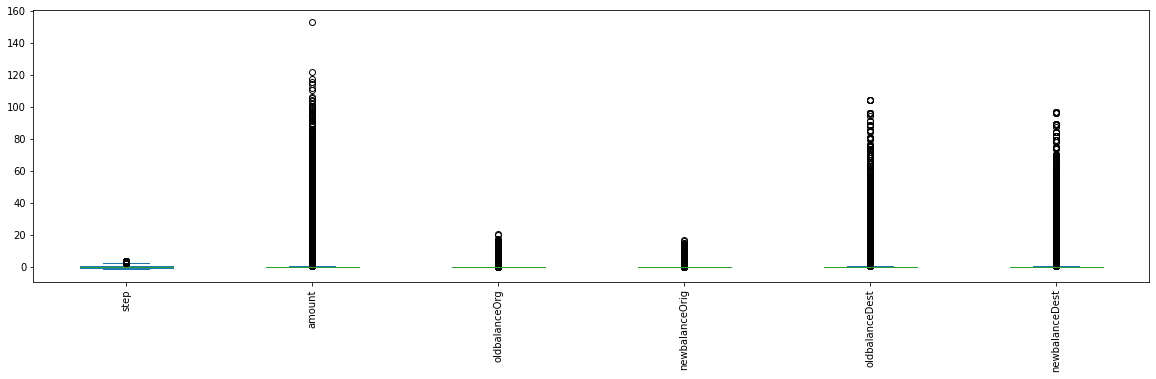

In [66]:
pd.DataFrame(datasetNorm, columns=numericColumns.columns).plot.box(figsize=(20,5), rot=90);

In [68]:
numericColumns = dataset.loc[:, ["step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]]
norm = preprocessing.StandardScaler().fit(numericColumns)
datasetStd = norm.transform(numericColumns)
datasetStd

array([[-1.70304158e+00, -2.81559923e-01, -2.29810037e-01,
        -2.37621696e-01, -3.23813895e-01, -3.33411405e-01],
       [-1.70304158e+00, -2.94767262e-01, -2.81359380e-01,
        -2.85812295e-01, -3.23813895e-01, -3.33411405e-01],
       [-1.70304158e+00, -2.97554804e-01, -2.88653782e-01,
        -2.92441707e-01, -3.23813895e-01, -3.33411405e-01],
       ...,
       [ 3.51012348e+00,  1.01539526e+01,  1.89649113e+00,
        -2.92441707e-01, -3.03665258e-01,  1.40302700e+00],
       [ 3.51012348e+00,  1.10976490e+00,  5.58104668e-03,
        -2.92441707e-01, -3.23813895e-01, -3.33411405e-01],
       [ 3.51012348e+00,  1.10976490e+00,  5.58104668e-03,
        -2.92441707e-01,  1.59138312e+00,  1.66981230e+00]])

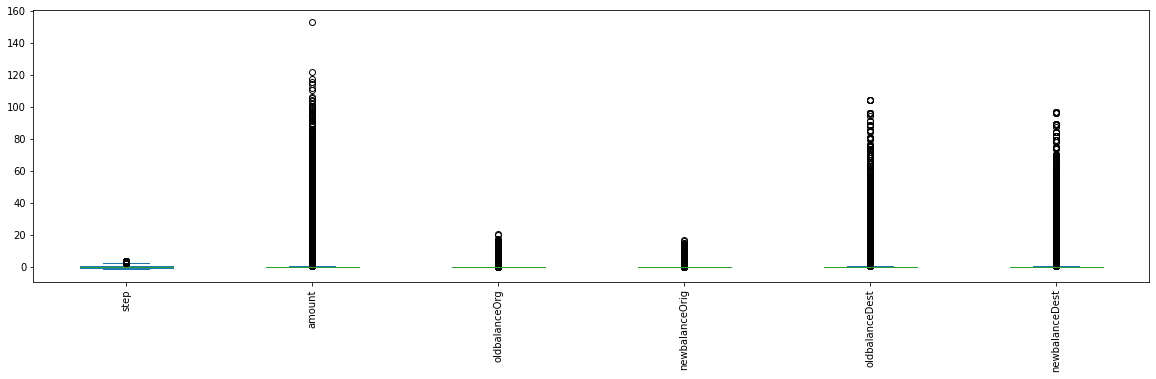

In [69]:
pd.DataFrame(datasetStd, columns=numericColumns.columns).plot.box(figsize=(20,5), rot=90);